In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [39]:
# read daily close price data
file_path = '/Users/edocampione/Desktop/Meng Engineering Science/4YP/data/ExxonMobil_CRSP_daily_data_alltime.csv'
df = pd.read_csv(file_path)

# Ensure that the date column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Keep both the 'date' and 'PRC' columns
df = df[["date", "PRC"]].copy()

print(df.head())

        date    PRC
0 1925-12-31  46.00
1 1926-01-02  46.00
2 1926-01-04  45.50
3 1926-01-05  45.25
4 1926-01-06  45.00


In [40]:
# Ensure the 'date' column is set as the index
df.set_index('date', inplace=True)
# Assign frequency information (daily in this case)
df = df.asfreq('D')  # 'D' stands for daily frequency


print(df.head())

             PRC
date            
1925-12-31  46.0
1926-01-01   NaN
1926-01-02  46.0
1926-01-03   NaN
1926-01-04  45.5


In [41]:
# check for missing values
print("Missing values:", df.isnull().sum())
# remove missing values
df = df.dropna()

print(df.head())

Missing values: PRC    9995
dtype: int64
              PRC
date             
1925-12-31  46.00
1926-01-02  46.00
1926-01-04  45.50
1926-01-05  45.25
1926-01-06  45.00


In [42]:
# Display summary statistics
df['PRC'].describe()

count    25798.000000
mean        63.530296
std         20.104773
min         20.250000
25%         47.000000
50%         62.750000
75%         77.500000
max        168.500000
Name: PRC, dtype: float64

In [43]:
start_date = '2000-01-31'
end_train_date = '2018-08-30'
test_end_date = '2020-08-31'

# Filter the data according to the date range
train_data = df[(df.index >= start_date) & (df.index <= end_train_date)]
test_data = df[(df.index > end_train_date) & (df.index <= test_end_date)]

In [44]:
# Augmented Dickey Fuller (ADF) test to check if the price is stationary

from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(train_data['PRC'])

# Print the result of the ADF test
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Used Lag:", adf_result[2])
print("Number of Observations Used:", adf_result[3])
print("Critical Values:", adf_result[4])
print("Conclusion: The series is stationary" if adf_result[1] < 0.05 else "Conclusion: The series is non-stationary")


ADF Statistic: -1.8065101279597926
p-value: 0.3772344194739909
Used Lag: 18
Number of Observations Used: 4658
Critical Values: {'1%': -3.431754660230483, '5%': -2.862160697900221, '10%': -2.5671003999674795}
Conclusion: The series is non-stationary


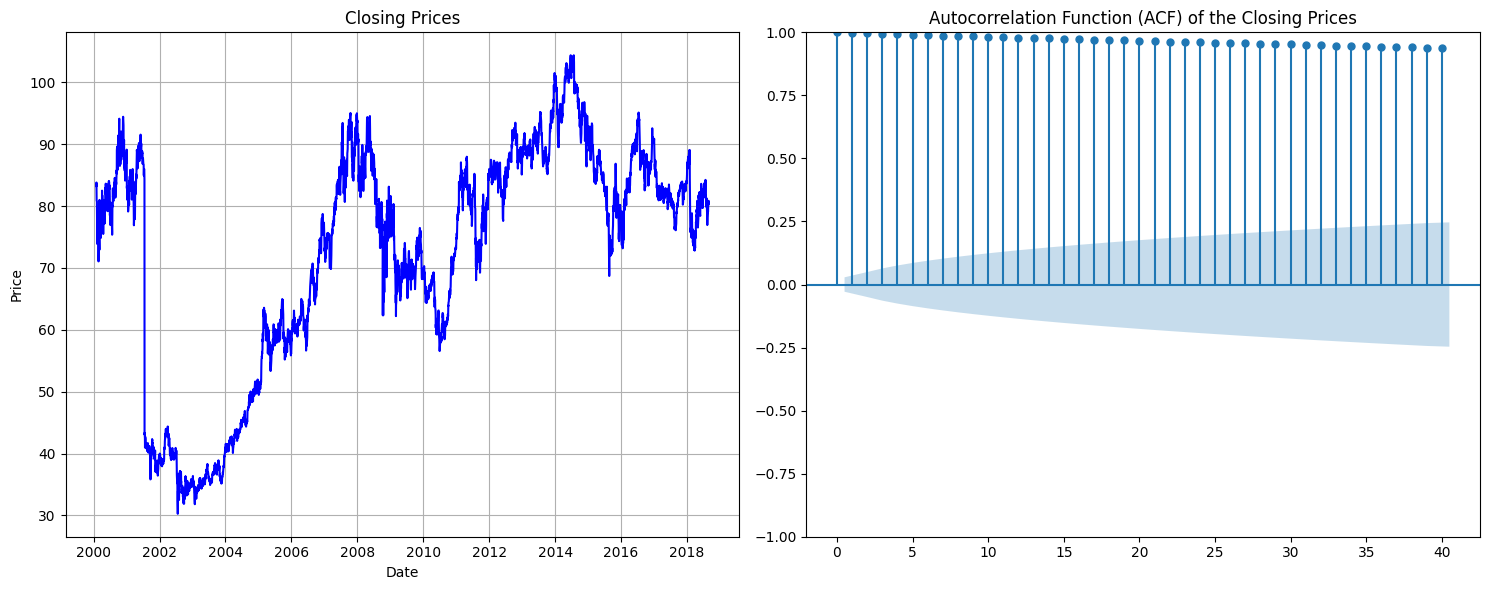

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

# Create a figure with 2 subplots (one for the price and one for the ACF)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the closing prices (Price vs Time)
axes[0].plot(train_data.index, train_data['PRC'], label="Closing Price", color='blue')
axes[0].set_title("Closing Prices")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price")
axes[0].grid(True)

# Plot the ACF for the 'PRC' column (on the second subplot)
plot_acf(train_data['PRC'], lags=40, ax=axes[1])  # lags=40 shows the ACF for up to 40 lags
axes[1].set_title('Autocorrelation Function (ACF) of the Closing Prices')

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/2f/bmcm36r135v_v27k0vz0w_dr0000gn/T/ipykernel_20586/88712460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'first_difference'] = train_data['PRC'].diff()


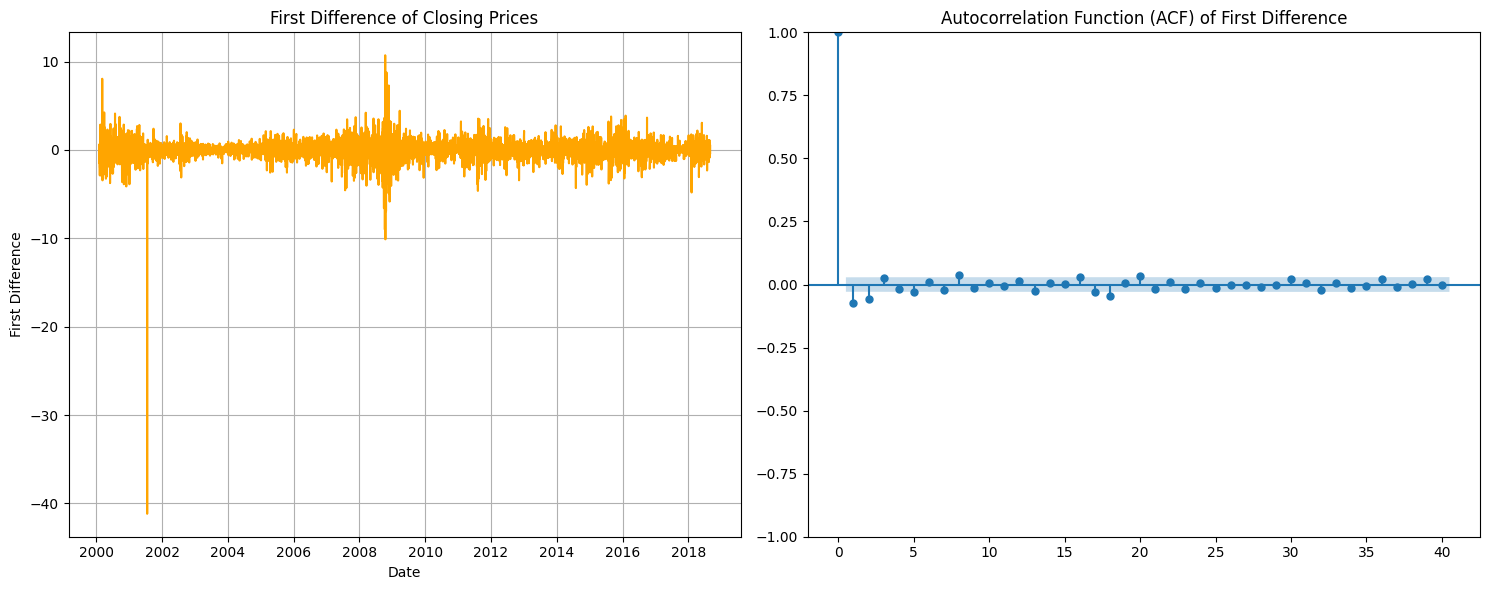

In [46]:
# Calculate the first difference of the closing prices
train_data.loc[:, 'first_difference'] = train_data['PRC'].diff()

# Create a figure with 2 subplots (one for the first difference and one for the ACF)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first difference (First Difference vs Time)
axes[0].plot(train_data.index, train_data['first_difference'], label="First Difference", color='orange')
axes[0].set_title("First Difference of Closing Prices")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("First Difference")
axes[0].grid(True)

# Plot the ACF for the first difference (on the second subplot)
plot_acf(train_data['first_difference'].dropna(), lags=40, ax=axes[1])  # dropna() to avoid NaN values
axes[1].set_title('Autocorrelation Function (ACF) of First Difference')

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/2f/bmcm36r135v_v27k0vz0w_dr0000gn/T/ipykernel_20586/1201525467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'second_difference'] = train_data['first_difference'].diff()


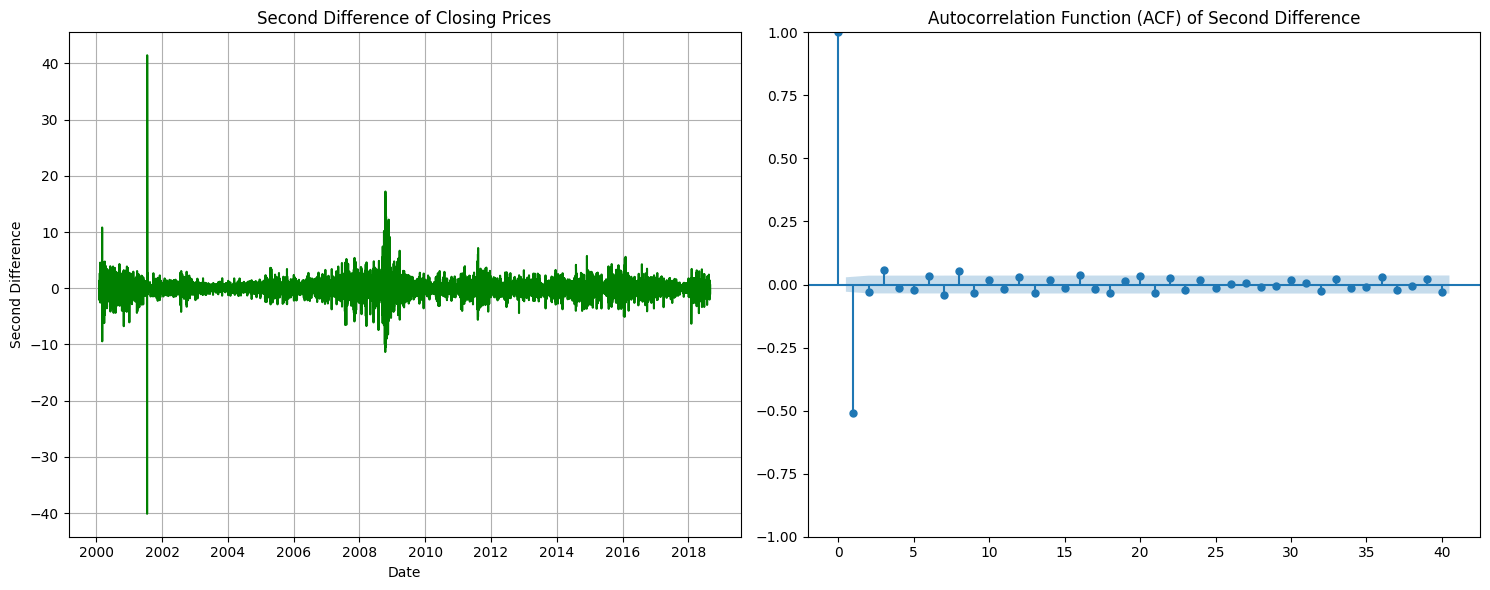

In [47]:
# Calculate the second difference (difference of the first differences)
train_data.loc[:, 'second_difference'] = train_data['first_difference'].diff()

# Create a figure with 2 subplots (one for the second difference and one for the ACF)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the second difference (Second Difference vs Time)
axes[0].plot(train_data.index, train_data['second_difference'], label="Second Difference", color='green')
axes[0].set_title("Second Difference of Closing Prices")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Second Difference")
axes[0].grid(True)

# Plot the ACF for the second difference (on the second subplot)
plot_acf(train_data['second_difference'].dropna(), lags=40, ax=axes[1])  # dropna() to avoid NaN values
axes[1].set_title('Autocorrelation Function (ACF) of Second Difference')

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
from pmdarima.arima.utils import ndiffs

# Remove missing values (NaN) from the 'PRC' column
cleaned_prc = train_data['PRC'].dropna()

# Find the number of differences (d) needed to make the series stationary
ndiffs_value = ndiffs(cleaned_prc)

# Print the result
print(f"Optimal number of differences (d): {ndiffs_value}")


Optimal number of differences (d): 1


<Figure size 1000x600 with 0 Axes>

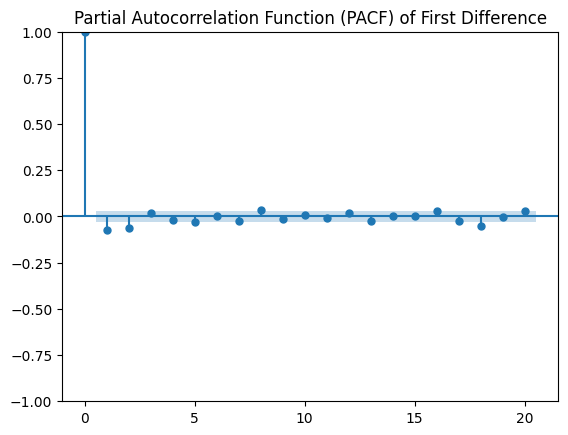

In [49]:
# p is the order of the autoregressive term

from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF for the first difference
plt.figure(figsize=(10, 6))
plot_pacf(train_data['first_difference'].dropna(), lags=20)  # dropna() to avoid NaN values
plt.title('Partial Autocorrelation Function (PACF) of First Difference')
plt.show()


In [50]:
from statsmodels.tsa.arima.model import ARIMA

train_data = train_data.asfreq('D')  # 'D' stands for daily frequency
test_data = test_data.asfreq('D')  # 'D' stands for daily frequency

# Fit an ARIMA model (AR(2), I(1), MA(2)) based on the PACF
model = ARIMA(train_data['PRC'], order=(2, 1, 1))  # AR(2), I(1), MA(2)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                    PRC   No. Observations:                 6787
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -7842.472
Date:                Thu, 28 Nov 2024   AIC                          15692.943
Time:                        15:47:50   BIC                          15720.234
Sample:                    01-31-2000   HQIC                         15702.362
                         - 08-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1162      0.097      1.195      0.232      -0.074       0.307
ar.L2         -0.0706      0.029     -2.409      0.016      -0.128      -0.013
ma.L1         -0.2809      0.098     -2.878      0.0

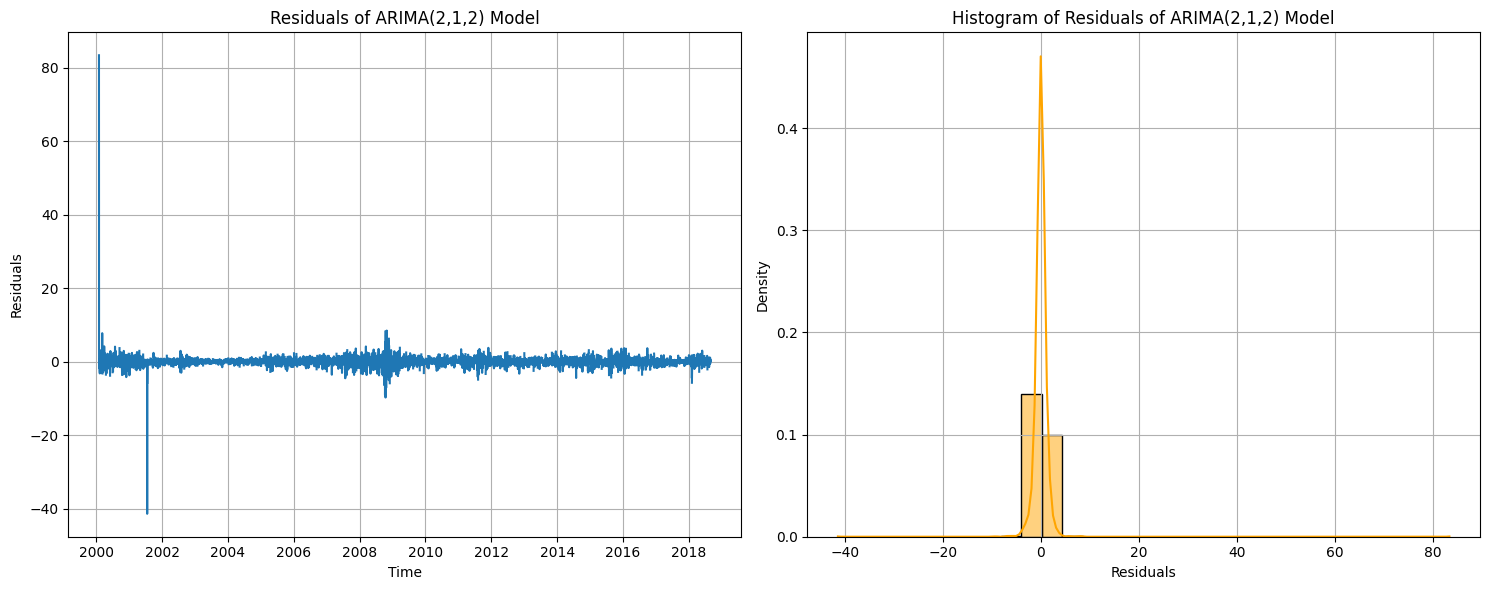

In [51]:
# Get the residuals (difference between observed and fitted values)
residuals = model_fit.resid

# Create a figure with 2 subplots (one for residuals and one for histogram)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the residuals
axes[0].plot(residuals)
axes[0].set_title('Residuals of ARIMA(2,1,2) Model')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Residuals')
axes[0].grid(True)

# Plot the histogram of residuals
sns.histplot(residuals, kde=True, bins=30, color='orange', stat='density', ax=axes[1])  # KDE = Kernel Density Estimation
axes[1].set_title('Histogram of Residuals of ARIMA(2,1,2) Model')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Density')
axes[1].grid(True)

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show the plots
plt.show()

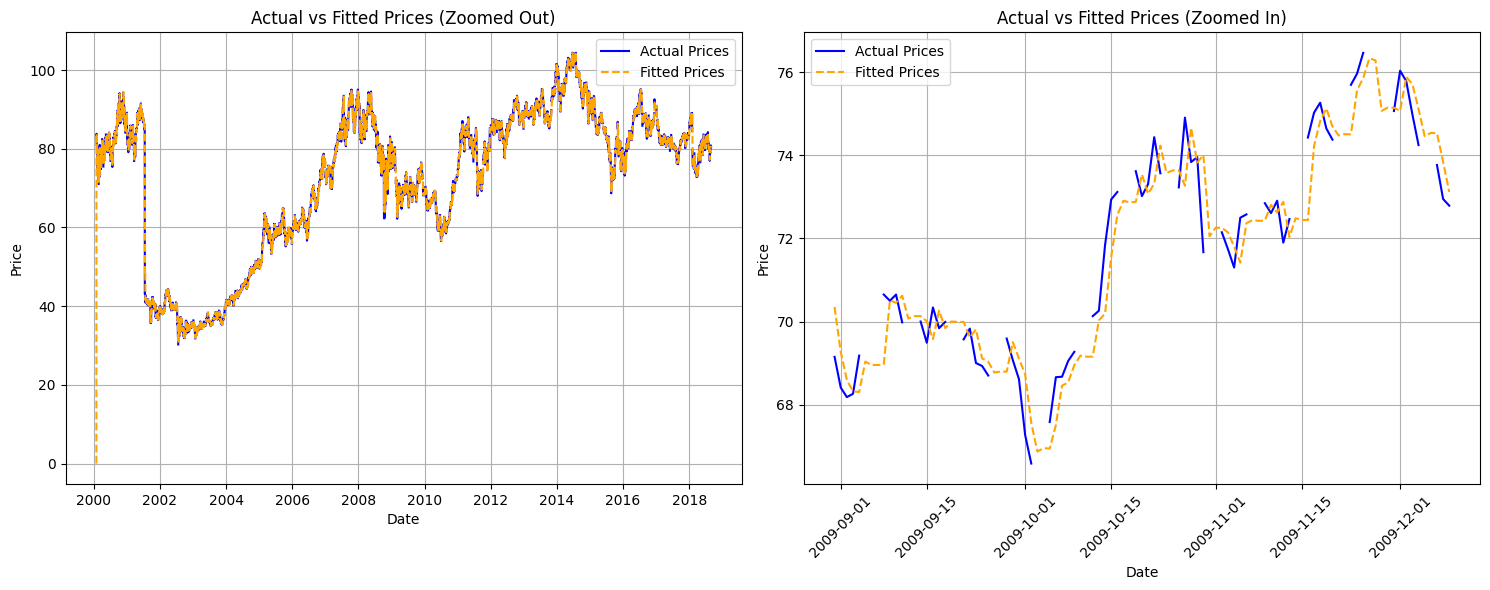

In [52]:
# Get the fitted values (predicted prices)
fitted_values = model_fit.fittedvalues

# Define the range of dates for the zoomed-in plot
start_date = train_data.index[3500]  # Adjust this index to the start of your desired section
end_date = train_data.index[3600]   # Adjust this index to the end of your desired section

# Create a figure with 2 subplots (zoomed-out and zoomed-in)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the zoomed-out actual vs fitted prices (full range)
axes[0].plot(train_data.index, train_data['PRC'], label='Actual Prices', color='blue')
axes[0].plot(train_data.index, fitted_values, label='Fitted Prices', color='orange', linestyle='--')
axes[0].set_title('Actual vs Fitted Prices (Zoomed Out)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True)

# Plot the zoomed-in actual vs fitted prices (subset of data)
axes[1].plot(train_data.loc[start_date:end_date].index, train_data.loc[start_date:end_date, 'PRC'], label='Actual Prices', color='blue')
axes[1].plot(train_data.loc[start_date:end_date].index, fitted_values.loc[start_date:end_date], label='Fitted Prices', color='orange', linestyle='--')
axes[1].set_title('Actual vs Fitted Prices (Zoomed In)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


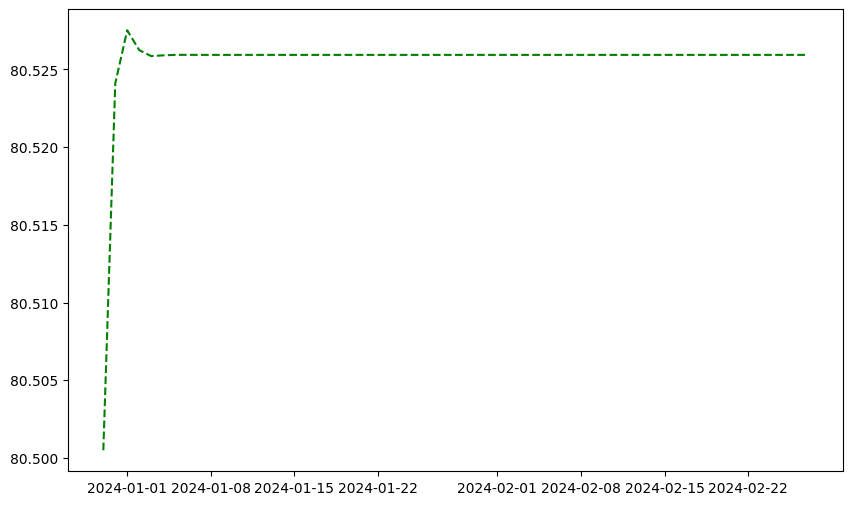

In [53]:
# Forecast the next 60 steps beyond the training data (e.g., 60 future periods)
forecast_steps = 60
forecast_results = model_fit.get_forecast(steps=forecast_steps)
# Forecasted values
forecast_values = forecast_results.predicted_mean

plt.figure(figsize=(10, 6))

# Plot the forecasted values (future predictions beyond the training period)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='D')[1:]  # Generate future dates
plt.plot(forecast_index, forecast_values, label='Forecasted Prices', color='green', linestyle='--')


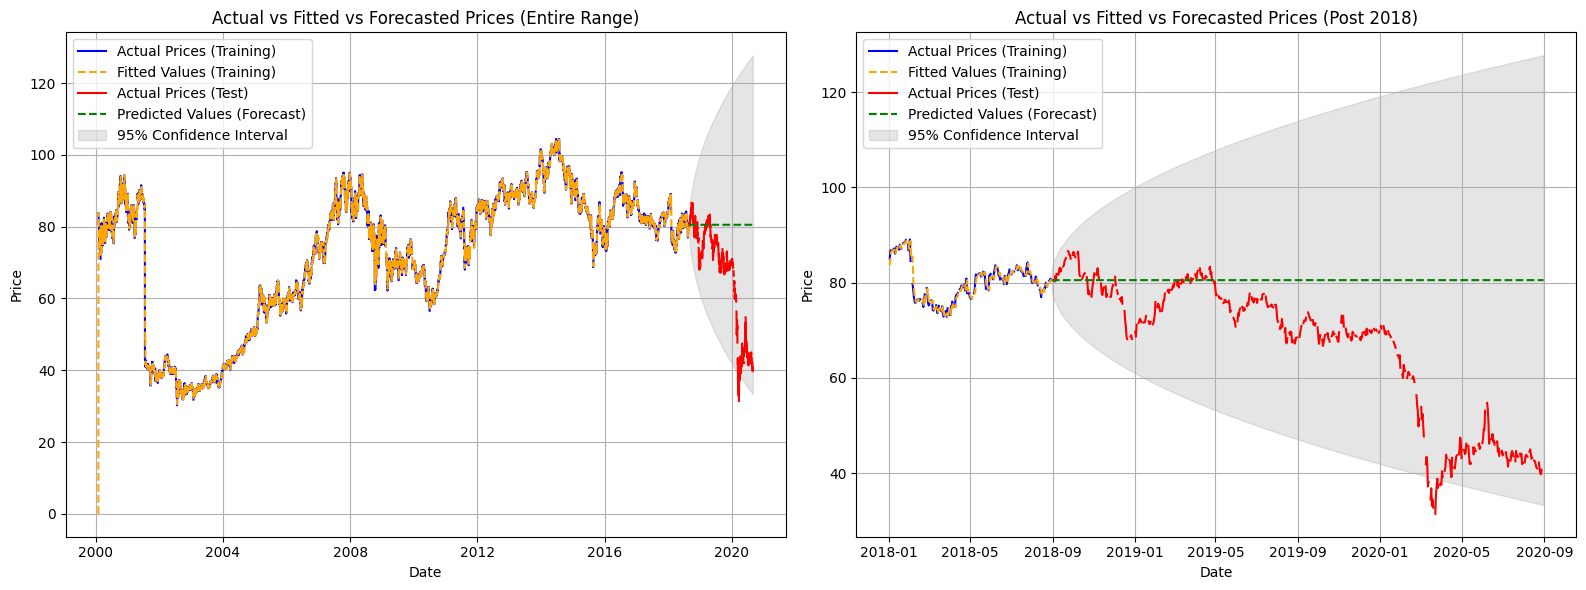

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming train_data and test_data are already defined and the ARIMA model is fitted

# Forecast the next 'len(test_data)' values (out-of-sample prediction)
forecast_results = model_fit.get_forecast(steps=len(test_data))

# Forecasted values
forecast_values = forecast_results.predicted_mean

# Confidence intervals for the forecast
conf_int = forecast_results.conf_int(alpha=0.05)

# Define the start date for the post-2018 plot
start_date_plot = '2018-01-01'

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot actual vs fitted values for the entire date range (including pre-2018 data)
axes[0].plot(train_data.index, train_data['PRC'], label='Actual Prices (Training)', color='blue')  # Whole range
axes[0].plot(train_data.index, model_fit.fittedvalues, label='Fitted Values (Training)', color='orange', linestyle='--')
axes[0].plot(test_data.index, test_data['PRC'], label='Actual Prices (Test)', color='red')
axes[0].plot(test_data.index, forecast_values, label='Predicted Values (Forecast)', color='green', linestyle='--')
axes[0].fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')
axes[0].set_title('Actual vs Fitted vs Forecasted Prices (Entire Range)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True)

# Plot actual vs fitted vs forecasted values for the post-2018 period
train_data_filtered = train_data[train_data.index >= start_date_plot]
test_data_filtered = test_data[test_data.index >= start_date_plot]
forecast_values_filtered = forecast_values[test_data.index >= start_date_plot]
conf_int_filtered = conf_int[conf_int.index >= start_date_plot]

axes[1].plot(train_data_filtered.index, train_data_filtered['PRC'], label='Actual Prices (Training)', color='blue')
axes[1].plot(train_data_filtered.index, model_fit.fittedvalues.loc[train_data_filtered.index], label='Fitted Values (Training)', color='orange', linestyle='--')
axes[1].plot(test_data_filtered.index, test_data_filtered['PRC'], label='Actual Prices (Test)', color='red')
axes[1].plot(test_data_filtered.index, forecast_values_filtered, label='Predicted Values (Forecast)', color='green', linestyle='--')
axes[1].fill_between(test_data_filtered.index, conf_int_filtered.iloc[:, 0], conf_int_filtered.iloc[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')
axes[1].set_title('Actual vs Fitted vs Forecasted Prices (Post 2018)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


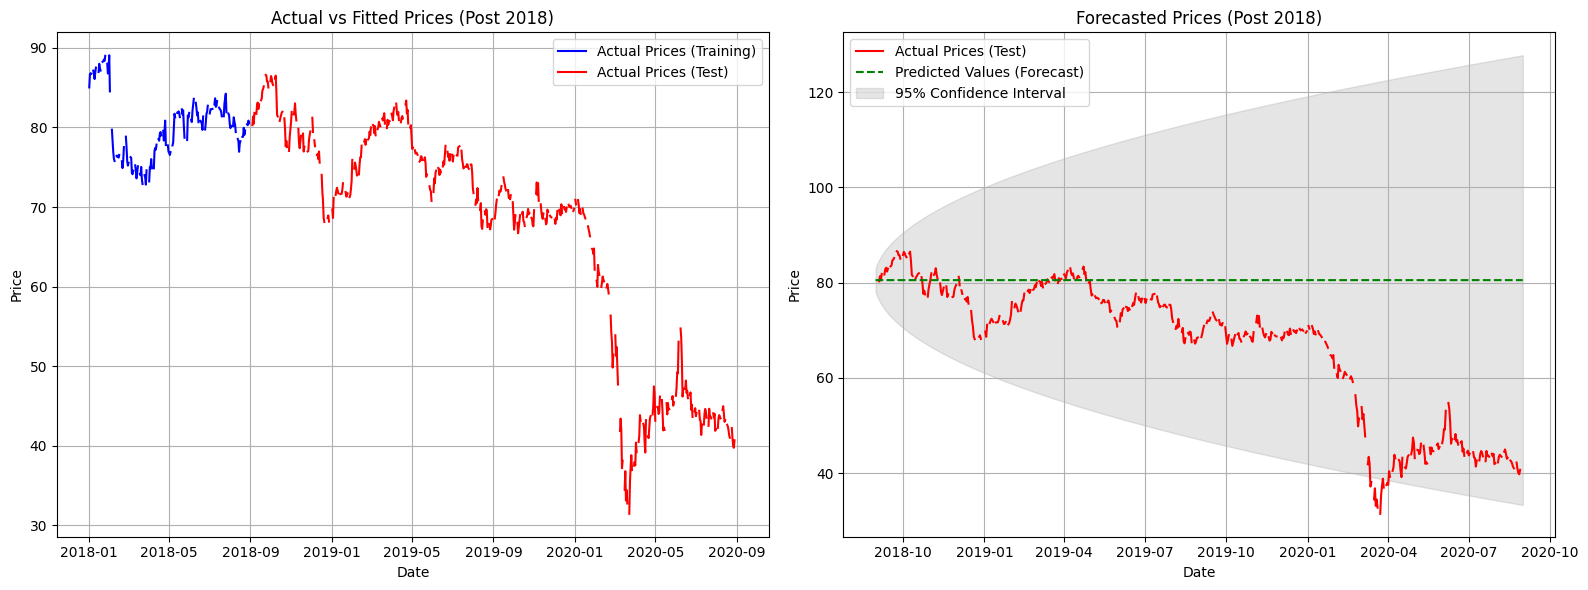

In [55]:
# Define the start date for the plots (after 2018)
start_date_plot = '2018-01-01'

# Filter the data to show only dates after 2018
train_data_filtered = train_data[train_data.index >= start_date_plot]
test_data_filtered = test_data[test_data.index >= start_date_plot]

# Forecast the next 'len(test_data)' values (out-of-sample prediction)
forecast_results = model_fit.get_forecast(steps=len(test_data_filtered))

# Forecasted values
forecast_values = forecast_results.predicted_mean

# Confidence intervals for the forecast
conf_int = forecast_results.conf_int(alpha=0.05)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot actual vs fitted values on the first subplot
axes[0].plot(train_data_filtered.index, train_data_filtered['PRC'], label='Actual Prices (Training)', color='blue')
axes[0].plot(test_data_filtered.index, test_data_filtered['PRC'], label='Actual Prices (Test)', color='red')
axes[0].set_title('Actual vs Fitted Prices (Post 2018)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True)

# Plot forecasted values on the second subplot
axes[1].plot(test_data_filtered.index, test_data_filtered['PRC'], label='Actual Prices (Test)', color='red')
axes[1].plot(test_data_filtered.index, forecast_values, label='Predicted Values (Forecast)', color='green', linestyle='--')
axes[1].fill_between(test_data_filtered.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')
axes[1].set_title('Forecasted Prices (Post 2018)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()
